# Mercedes-Benz Greener Manufacturing

DESCRIPTION

Reduce the time a Mercedes-Benz spends on the test bench.

Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

Following actions should be performed:

> If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

> Check for null and unique values for test and train sets.

> Apply label encoder.

> Perform dimensionality reduction.

> Predict your test_df values using XGBoost.

In [1]:
# Importing the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading both Datasets
train_data = pd.read_csv('train.csv')
test_data= pd.read_csv('test.csv')


Checking/Viewing both data

In [3]:
train_data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_data.shape

(4209, 378)

In [5]:
train_data.dtypes

ID        int64
y       float64
X0       object
X1       object
X2       object
         ...   
X380      int64
X382      int64
X383      int64
X384      int64
X385      int64
Length: 378, dtype: object

In [6]:
test_data.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [7]:
test_data.shape

(4209, 377)

In [8]:
test_data.dtypes

ID       int64
X0      object
X1      object
X2      object
X3      object
         ...  
X380     int64
X382     int64
X383     int64
X384     int64
X385     int64
Length: 377, dtype: object

In [9]:
train_data.isna().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

Since there are 378 columns in the train dataset we cannot decide if there are any null values present in the dataset by using the above method so we will apply a different method to check for the null values.

In [10]:
train_data.isna().sum().any()

False

In [11]:
test_data.isna().sum().any()

False

Both data consists of some object type data as well and the train data have one extra column available('y'), so it can be considered that we have to perform operations to determine 'y'(Output/Label) and test our model against the test data.

And the datasets have alot of columns.

> The data looks as if somekind of encoding has already been applied to hide/secure the features of the cars

### If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

In [12]:
#Creating a copy of our dataset to perform some EDA
train_df=train_data.copy()

In [13]:
train_df.shape

(4209, 378)

In [14]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


### Now since we know that the "ID" column is of no use and the "y" column is the output/label column we can omit these two as well

In [15]:
train_df.drop('ID',axis=1,inplace=True)

In [16]:
train_df.shape

(4209, 377)

In [17]:
# Removing all those columns who have zero variance and omitting 'y' column from this test
train_df.drop('y',axis=1)
for i in train_df:
    if train_df[i].dtype=='object':
        pass
    elif np.var(train_df[i])==0:
        train_df.drop([train_df[i].name],axis=1,inplace=True)

In [18]:
train_df.shape

(4209, 365)

In [19]:
train_df.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0


### Now we have removed all those columns whose varaince was zero and we cannot remove all those object columns as the data itself has some kind of encoding done so it will be nuisance to remove those columns without knowing their significance and the 'y' column is the output/label so we cannot remove that either

 --------------------------------------------------------------------------------------------------------------------------


### Now we are going to split our dataset

In [20]:
train_data_features = train_df.drop(columns=['y'])
train_data_target = train_df.y
print(train_data_features.shape)
print(train_data_target.shape)

(4209, 364)
(4209,)


In [21]:
# Checking the feature and target datasets
train_data_features

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,k,v,at,a,d,u,j,o,0,0,...,0,0,1,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,...,1,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,...,0,0,0,0,0,0,1,0,0,0
3,az,t,n,f,d,x,l,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,j,o,t,d,d,aa,h,h,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,ak,v,r,a,d,aa,g,e,0,1,...,0,0,1,0,0,0,0,0,0,0
4207,al,r,e,f,d,aa,l,u,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
train_data_target

0       130.81
1        88.53
2        76.26
3        80.62
4        78.02
         ...  
4204    107.39
4205    108.77
4206    109.22
4207     87.48
4208    110.85
Name: y, Length: 4209, dtype: float64

### We still have some object data type in our feature dataset, so we need to apply somekind of encoding before moving on to the model part

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() # instaniating the class

In [24]:
for i in train_data_features:
    if train_data_features[i].dtype=='object':
        print(train_data_features[i].name)
        train_data_features[i]=le.fit_transform(train_data_features[i])
    else:
        pass

X0
X1
X2
X3
X4
X5
X6
X8


In [25]:
# Now checking the features dataset after encoding
train_data_features

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8,20,16,2,3,0,3,16,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,31,16,40,3,3,0,7,7,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,8,23,38,0,3,0,6,4,0,1,...,0,0,1,0,0,0,0,0,0,0
4207,9,19,25,5,3,0,11,20,0,0,...,0,0,0,0,0,0,0,0,0,0


Checking for correlation of the variables to decide which technique to use further.

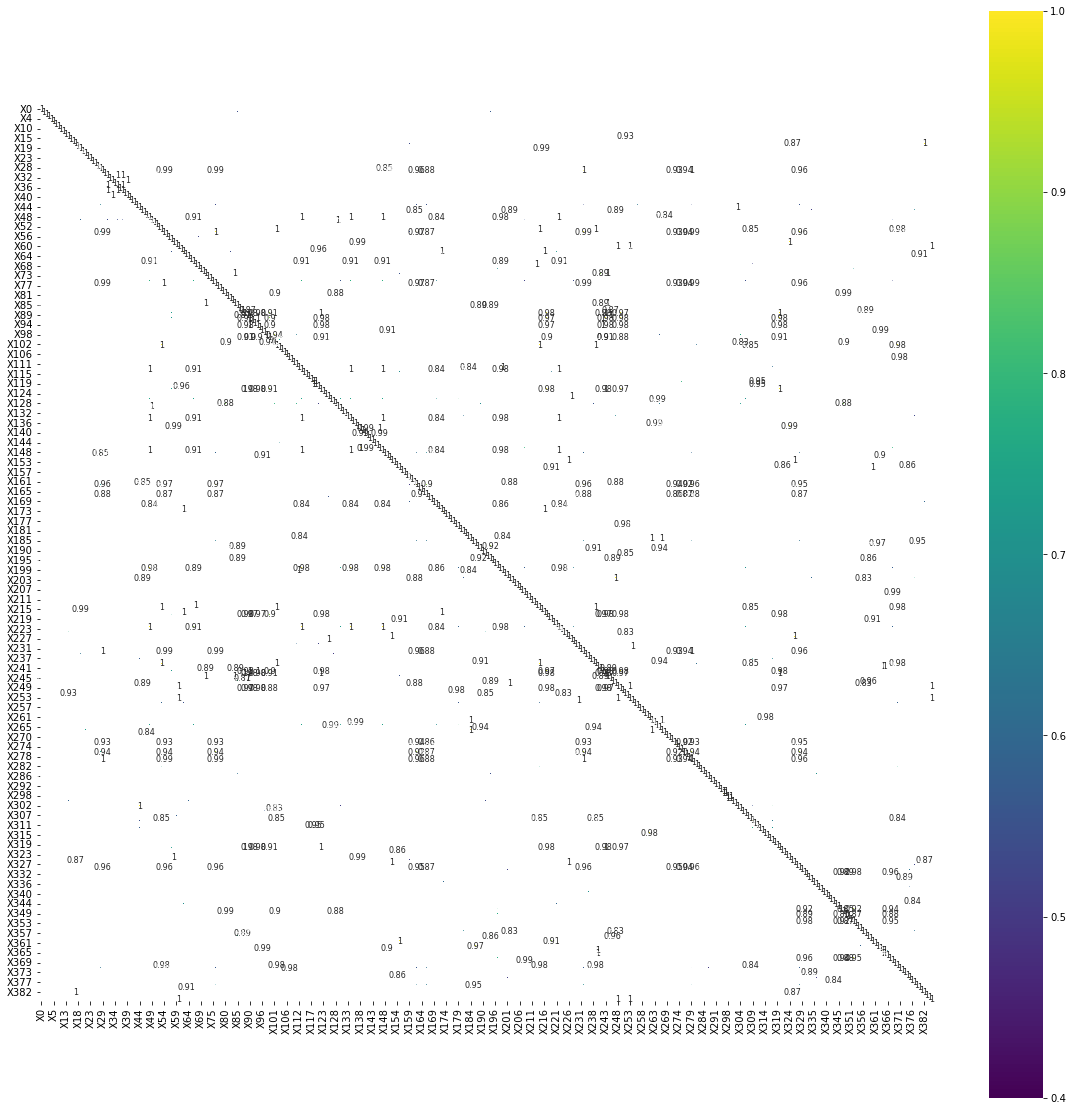

In [39]:
corr=train_data_features.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr[(corr>=0.5)],cmap='viridis',vmax=1.0,vmin=0.4,linewidths=0.1,annot=True,annot_kws={'size':8},square=True)
plt.show()

#### As the varibales are highly coorelated and the proper expalnation about the variables/features(columns) are also not mentioned for security purpose, we must proceed by trying to keep as much features(columns) intact as possible, so we will have to use any dimesionality reduction technique and since the data is highly correlated and have too many features we are going to use the PCA algorithm. In case of less amount of features/columns we can use the SVD(Singular Value Decomposition)

In [26]:
from sklearn.decomposition import PCA
pca=PCA(n_components=.95) # we are keeping the 95% of the original data(features)

In [27]:
pca.fit(train_data_features,train_data_target)

PCA(n_components=0.95)

In [28]:
train_data_features_trans=pca.fit_transform(train_data_features)
print(train_data_features_trans.shape)

(4209, 6)


In [29]:
train_data_features_trans

array([[  0.6147646 ,  -0.13300945,  15.62446002,   3.68756407,
          1.35957377,  -2.69141743],
       [  0.56540665,   1.56033294,  17.9095812 ,  -0.09290212,
          1.53664826,  -4.44287654],
       [ 16.20171258,  12.29284626,  17.6335395 ,   0.18630797,
         11.85081968,  -2.155389  ],
       ...,
       [ 29.00466039,  14.86090532,  -7.75333217,  11.22441548,
         -5.84698483,   0.78930643],
       [ 22.97242171,   1.68482437,  -9.03124768,   9.74980524,
          9.4495573 ,  -4.35522827],
       [-17.28304831,  -9.95198181,  -3.71935977,  18.3430963 ,
          8.40170568,   0.50947971]])

### Now, since we have done all the steps and our dataset is ready now we can apply XGBoost

In [30]:
#!pip install xgboost

In [31]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [32]:
train_x,test_x,train_y,test_y=train_test_split(train_data_features_trans,train_data_target,test_size=0.3,random_state=7)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(2946, 6)
(2946,)
(1263, 6)
(1263,)


### Using XGBoost we are checking the RMSE

In [33]:
xgb_reg = xgb.XGBRegressor()
model = xgb_reg.fit(train_x,train_y)
print('RMSE =',np.sqrt(mean_squared_error(model.predict(test_x),test_y)))

RMSE = 11.095226849772677
